## R Prep Minicourse
### Week 13: Getting and Attaching Data from Libraries, Linear Models, Making Predictions

**Credits:** [Linear Regression](https://www.r-bloggers.com/r-tutorial-series-simple-linear-regression/) and [Predict Function](https://www.dummies.com/programming/r/how-to-predict-new-data-values-with-r/) Tutorials

#### Getting and Attaching Data

You won't believe it. To load a data set, you can use either the `library()` or `data()` functions. The former loads the entire package,  whereas the latter just the specified data set.

`library(packagename)`

`data(datasetname, package="packagename")`

To access the contents of a data set column, you usually have the use the syntax `dataset$column`. This can be avoided if you "attach" the data set, which renders its contents available directly (see the example below). Doing this is not always recommended, because the names of your coluns might supersede functions or variables with the same name. It is good practice to "detach" the data set after the goal of attaching it was accomplished.

`attach(datasetname)`

`detach(datasetname)`

In [1]:
# You will study the lalonde data set in great depth during CS112. Let's load it:
data(lalonde, package="Matching")  # or
library(Matching)

# Now, taking at look at the structure of the data:
str(lalonde)

Loading required package: MASS
## 
##  Matching (Version 4.9-2, Build Date: 2015-12-25)
##  See http://sekhon.berkeley.edu/matching for additional documentation.
##  Please cite software as:
##   Jasjeet S. Sekhon. 2011. ``Multivariate and Propensity Score Matching
##   Software with Automated Balance Optimization: The Matching package for R.''
##   Journal of Statistical Software, 42(7): 1-52. 
##



'data.frame':	445 obs. of  12 variables:
 $ age    : int  37 22 30 27 33 22 23 32 22 33 ...
 $ educ   : int  11 9 12 11 8 9 12 11 16 12 ...
 $ black  : int  1 0 1 1 1 1 1 1 1 0 ...
 $ hisp   : int  0 1 0 0 0 0 0 0 0 0 ...
 $ married: int  1 0 0 0 0 0 0 0 0 1 ...
 $ nodegr : int  1 1 0 1 1 1 0 1 0 0 ...
 $ re74   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ re75   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ re78   : num  9930 3596 24910 7506 290 ...
 $ u74    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ u75    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ treat  : int  1 1 1 1 1 1 1 1 1 1 ...


In [2]:
# We cannot access the data set variables directly. This returns an error:
lalonde$treat

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0

In [9]:
# However, if we attach the data set, all columns become directly accessible:
attach(lalonde)

The following objects are masked from lalonde (pos = 3):

    age, black, educ, hisp, married, nodegr, re74, re75, re78, treat,
    u74, u75



In [10]:
# How many treatment units?
sum(treat)

detach(lalonde)  # Good practice
treat

[1] 185

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[445] 0

#### Linear Models

We train linear models with the `lm()` function. Remember that in linear regression, we are trying to model the relationship between an outcome variable and one or more predictors through an equation of the form $Y = \beta_0 +\beta_1X_1 + \dots + \beta_nX_n $, where $X_i$ are the predictors, $\beta_i$ the coefficients we're estimating, and $Y$ the outcome variable. We train linear models with the following syntax:

`lm([target variable] ~ [predictor variables], data = [data source])`

In [11]:
# What is the relationship between age and real income in 1978?

lm1 <- lm(re78 ~ age, data=lalonde)

# This also works:
lm2 <- lm(lalonde$re78 ~ lalonde$age)

# Or still
attach(lalonde)
lm3 <- lm(re78 ~ age)
detach(lalonde)

The following objects are masked from lalonde (pos = 3):

    age, black, educ, hisp, married, nodegr, re74, re75, re78, treat,
    u74, u75



In [12]:
# You can view the coefficients of the model by accessing the linear model object
lm1


Call:
lm(formula = re78 ~ age, data = lalonde)

Coefficients:
(Intercept)          age  
    3946.18        53.39  


In [13]:
# the summary() function provides additional information:
summary(lm1)

# Ignoring everything else, the model is telling us that
# each additional year of age should lead to an additional
# $53 in 1978 real income.


Call:
lm(formula = re78 ~ age, data = lalonde)

Residuals:
   Min     1Q Median     3Q    Max 
 -6616  -4996  -1579   2817  54867 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3946.18    1167.07   3.381 0.000785 ***
age            53.39      44.30   1.205 0.228781    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6628 on 443 degrees of freedom
Multiple R-squared:  0.003268,	Adjusted R-squared:  0.001018 
F-statistic: 1.452 on 1 and 443 DF,  p-value: 0.2288


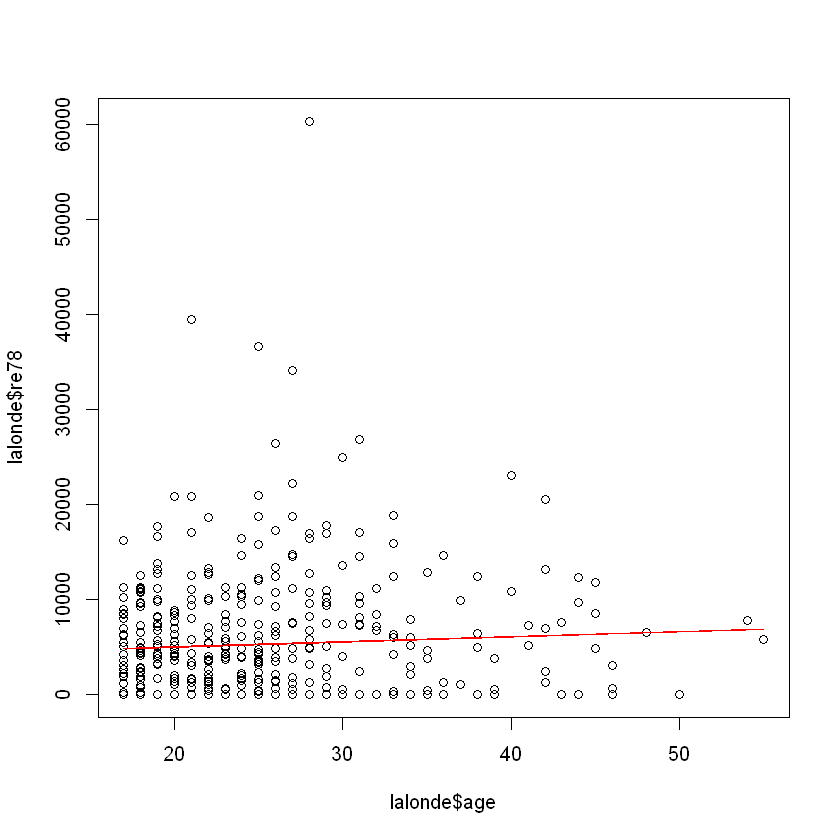

In [14]:
# You can acess the predictions of the linear model
# with lm$fitted.values. The lines below plot the data
# and the line of best fit. In this case, we see that
# age is a very poor predictor of re78 income.
plot(lalonde$age, lalonde$re78)
lines(lalonde$age, lm1$fitted.values, col="red")

In [15]:
# If we want to implement multivariate linear regression,
# we just add additional predictors with the + operator

lm.multivariate1 <- lm(re78 ~ treat + age, data=lalonde)
summary(lm.multivariate1)


Call:
lm(formula = re78 ~ treat + age, data = lalonde)

Residuals:
   Min     1Q Median     3Q    Max 
 -7296  -4552  -1834   2900  53856 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3379.34    1176.21   2.873  0.00426 **
treat        1758.57     633.65   2.775  0.00575 **
age            46.92      44.03   1.066  0.28722   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6579 on 442 degrees of freedom
Multiple R-squared:  0.02034,	Adjusted R-squared:  0.01591 
F-statistic: 4.588 on 2 and 442 DF,  p-value: 0.01066


In [16]:
# We can use the : operator to add interaction terms:
lm.ie <- lm(re78 ~ treat + age + treat:age, data=lalonde)

# var1*var2 is equivalent to var1 + var2 + var1:var2
# Hence, this is equivalent to the above:
lm.ie2 <- lm(re78 ~ treat*age, data=lalonde)

# You can use the . operator to use all columns
# of the data set as predictors
lm.full <- lm(re78 ~ ., data=lalonde)
summary(lm.full)


Call:
lm(formula = re78 ~ ., data = lalonde)

Residuals:
   Min     1Q Median     3Q    Max 
 -9612  -4355  -1572   3054  53119 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  2.567e+02  3.522e+03   0.073  0.94193   
age          5.357e+01  4.581e+01   1.170  0.24284   
educ         4.008e+02  2.288e+02   1.751  0.08058 . 
black       -2.037e+03  1.174e+03  -1.736  0.08331 . 
hisp         4.258e+02  1.565e+03   0.272  0.78562   
married     -1.463e+02  8.823e+02  -0.166  0.86835   
nodegr      -1.518e+01  1.006e+03  -0.015  0.98797   
re74         1.234e-01  8.784e-02   1.405  0.16079   
re75         1.974e-02  1.503e-01   0.131  0.89554   
u74          1.380e+03  1.188e+03   1.162  0.24590   
u75         -1.071e+03  1.025e+03  -1.045  0.29651   
treat        1.671e+03  6.411e+02   2.606  0.00948 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6517 on 433 degrees of freedom
Multiple R-squared:  0.05822,

#### Making predictions

We make predictions with the `predict()` function, passing both the model and the data points whose outcomes we want to estimate.

`predict([model], newdata=[data])`

In [17]:
# Let's split the data into training and test sets

trainingRowIndex <- sample(1:nrow(lalonde), 0.8*nrow(lalonde))  # row indices for training data
trainingData <- lalonde[trainingRowIndex, ]  # model training data
testData  <- lalonde[-trainingRowIndex, ]   # test data

In [18]:
# Train the model only with the training data
lm.full.partial <- lm(re78 ~ ., data = trainingData)

# This is equivalent
lm.full.partial <- lm(re78 ~ ., data = lalonde, subset = trainingRowIndex)

In [19]:
# Because we used only part of the data, our coefficient estimates
# have changed
lm.full
lm.full.partial


Call:
lm(formula = re78 ~ ., data = lalonde)

Coefficients:
(Intercept)          age         educ        black         hisp      married  
  2.567e+02    5.357e+01    4.008e+02   -2.037e+03    4.258e+02   -1.463e+02  
     nodegr         re74         re75          u74          u75        treat  
 -1.518e+01    1.234e-01    1.974e-02    1.380e+03   -1.071e+03    1.671e+03  



Call:
lm(formula = re78 ~ ., data = lalonde, subset = trainingRowIndex)

Coefficients:
(Intercept)          age         educ        black         hisp      married  
 -1354.1078      90.5479     397.0272   -1433.3008    1738.1509    -106.1400  
     nodegr         re74         re75          u74          u75        treat  
   380.4360       0.1457      -0.0362    1119.4110   -1155.8883    2028.2240  


Remember the formula for the root-mean-square error:

$\text{RMSE} = \sqrt\frac{\sum_{i=1}^n(y_i - \hat{y_i})^2}{N}$

In [20]:
# What is the RMSE of the model on the test data?

# STEP 1: Make predictions for the test data
y_test_pred = predict(lm.full.partial, testData)

# STEP 2: Calculate the residuals
test_residuals = testData$re78 - y_test_pred

# STEP 3: Square, mean, root
RMSE = sqrt(mean(test_residuals^2))
print(RMSE)

[1] 4989.064
